In [11]:
import matplotlib.pyplot as plt
import numpy as np
import json
from pathlib import Path

fn = sorted((Path("..") / ".benchmarks").rglob("*.json"))[-1]

with open(fn) as f:
    data = json.load(f)

cpu_brand = data["machine_info"]["cpu"]["brand_raw"]

results = {}
for b in data["benchmarks"]:
    name = b["name"]
    params = b["params"]
    n = params["n"]
    n = int(n)
    lib = params["lib"]
    if name.startswith("test_speed["):
        kind = params["kind"]
    else:
        kind = ".".join(name.split("[")[0].split("_")[2:])
    t = b["stats"]["min"]
    results.setdefault(kind, {}).setdefault(lib, []).append((n, t))

for kind in results:
    for lib in results[kind]:
        vals = results[kind][lib]
        results[kind][lib] = np.transpose(vals)

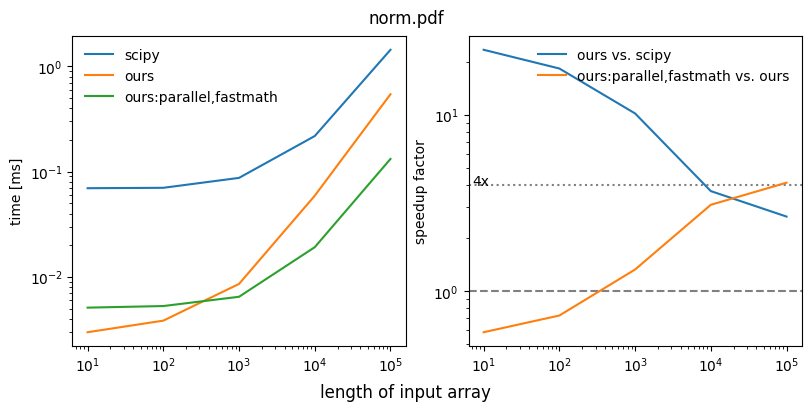

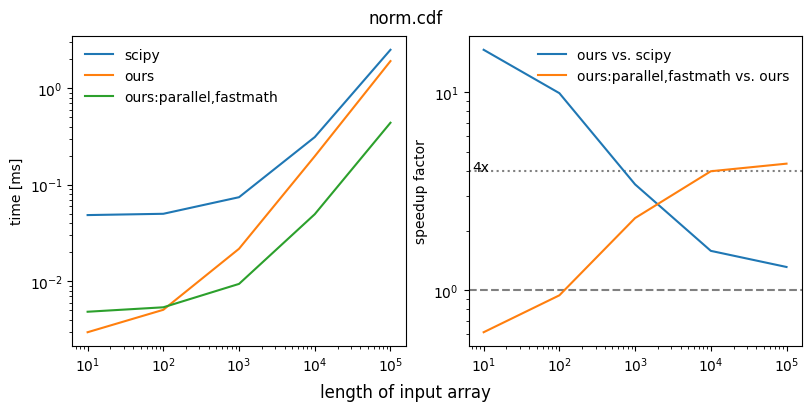

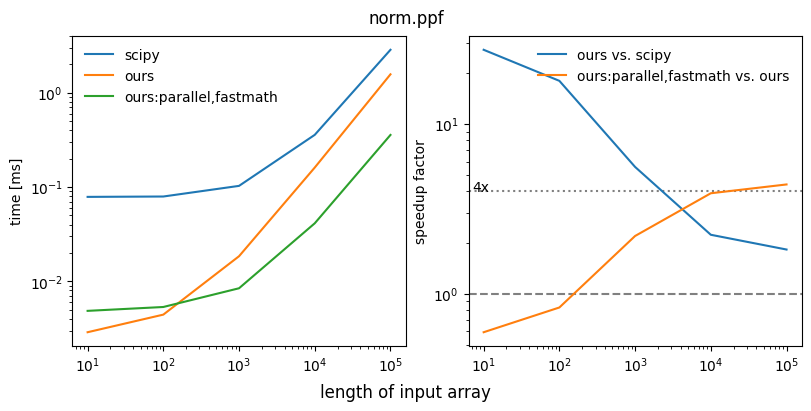

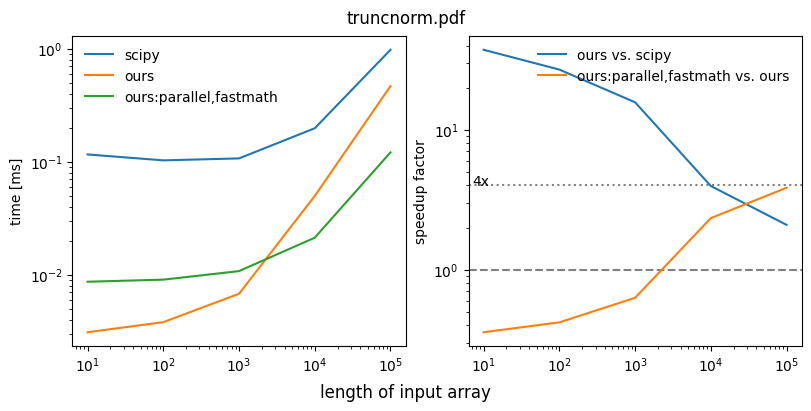

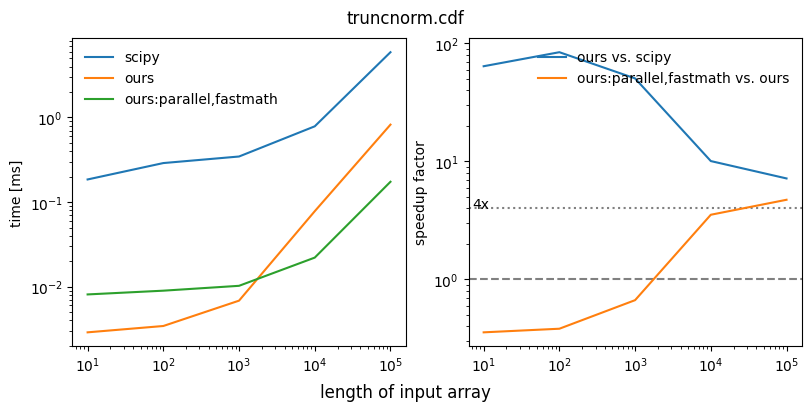

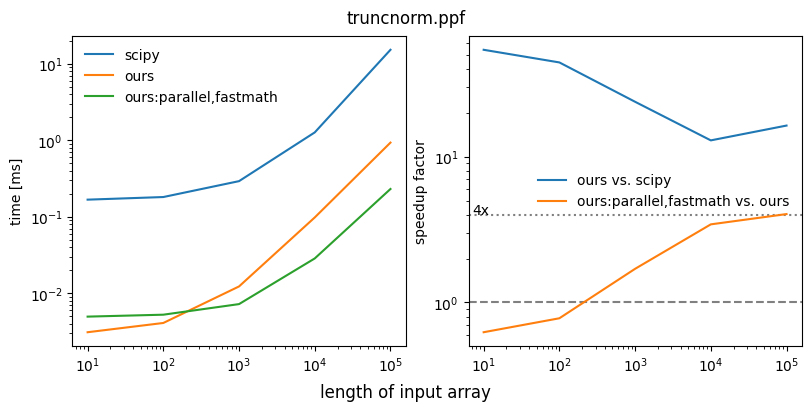

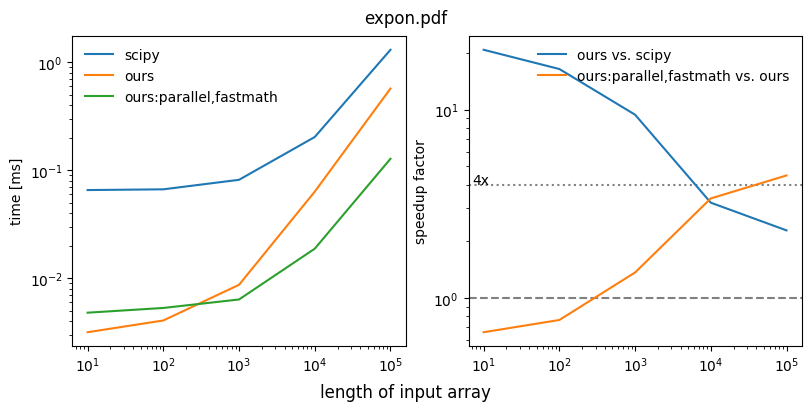

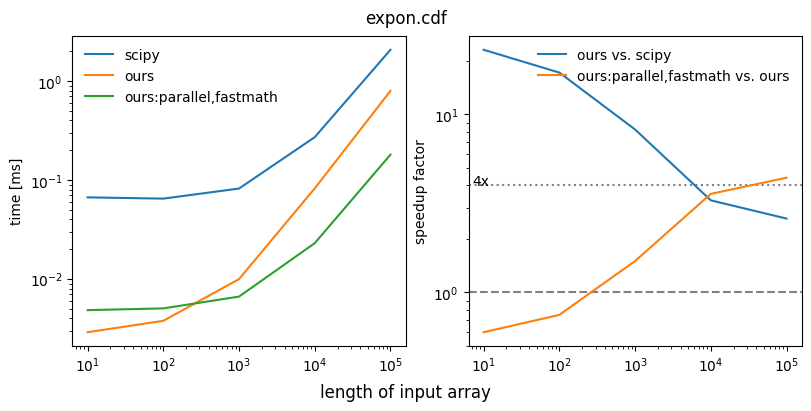

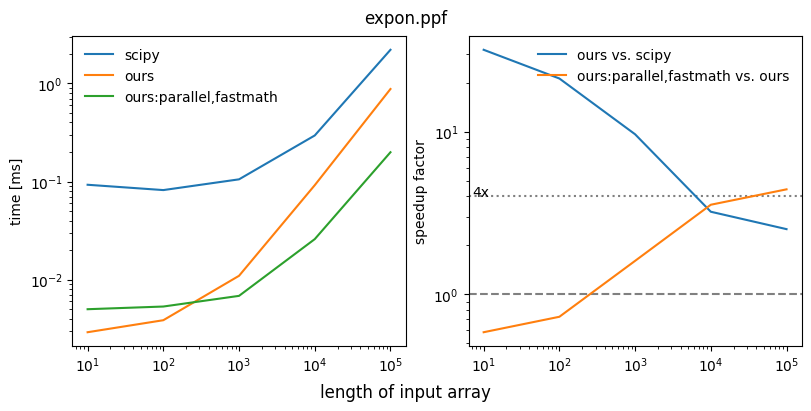

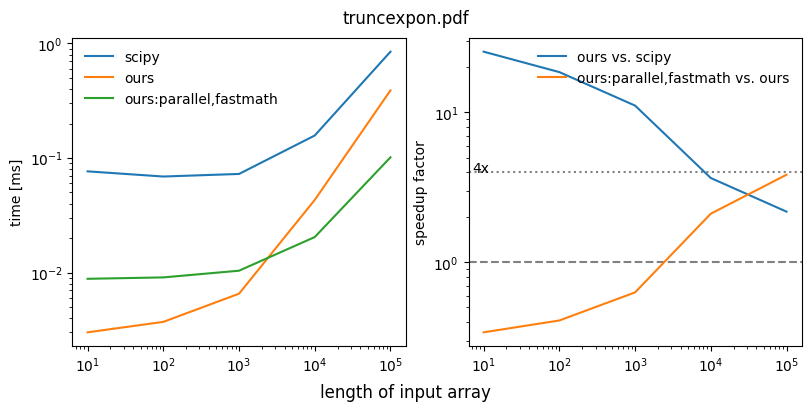

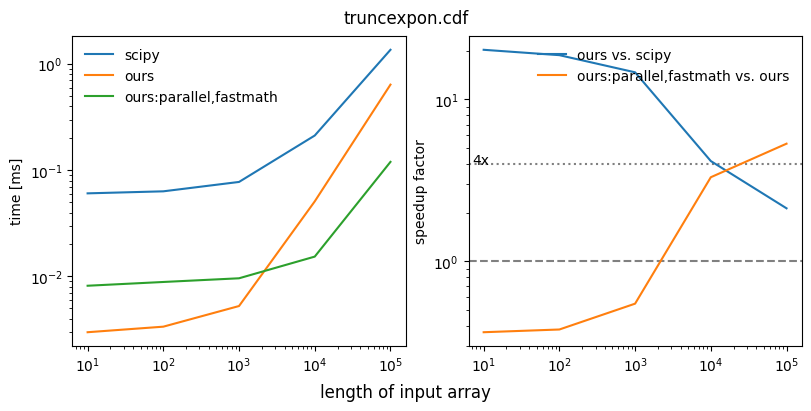

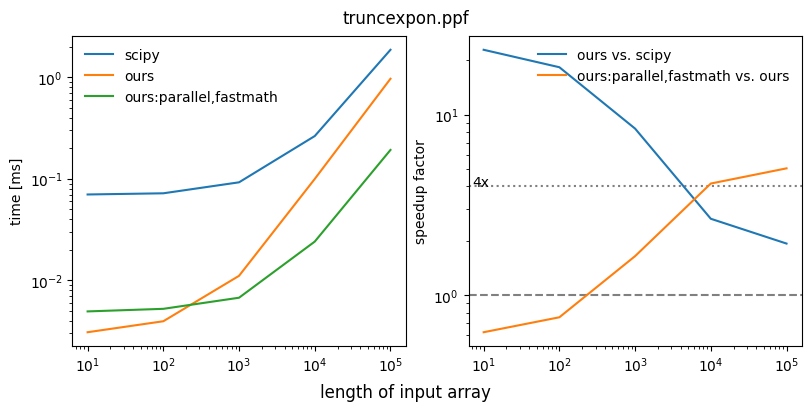

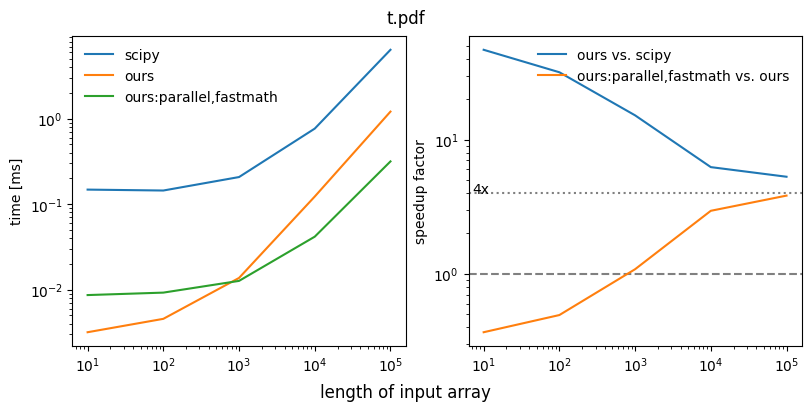

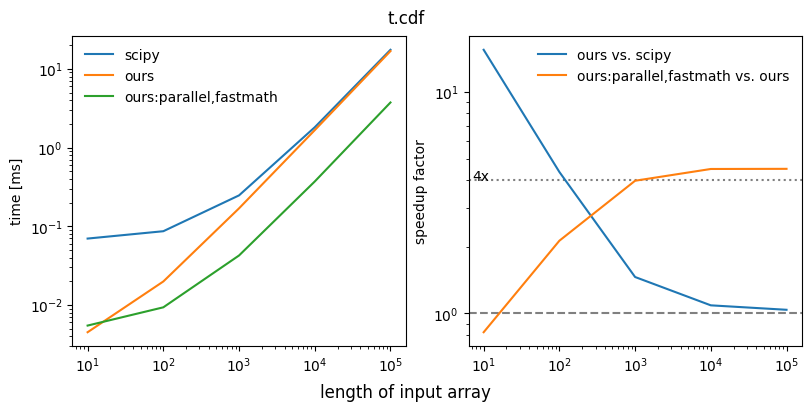

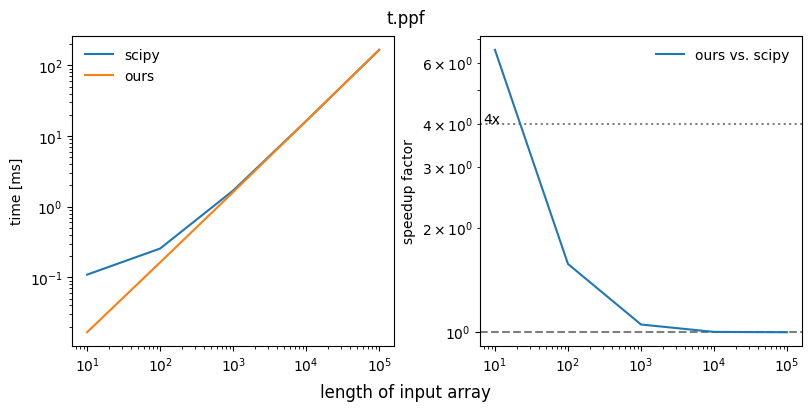

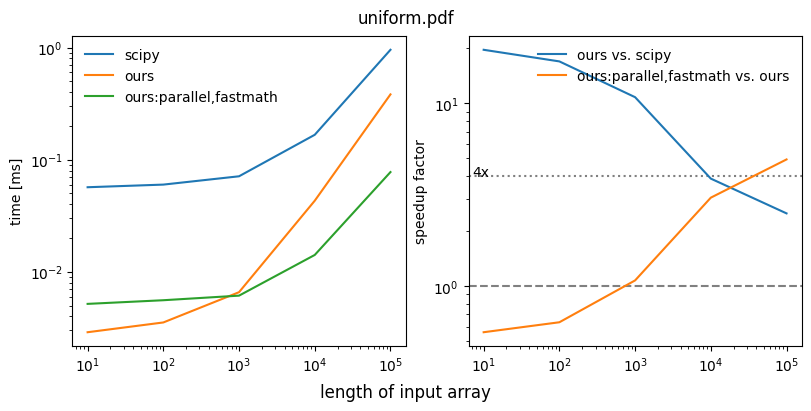

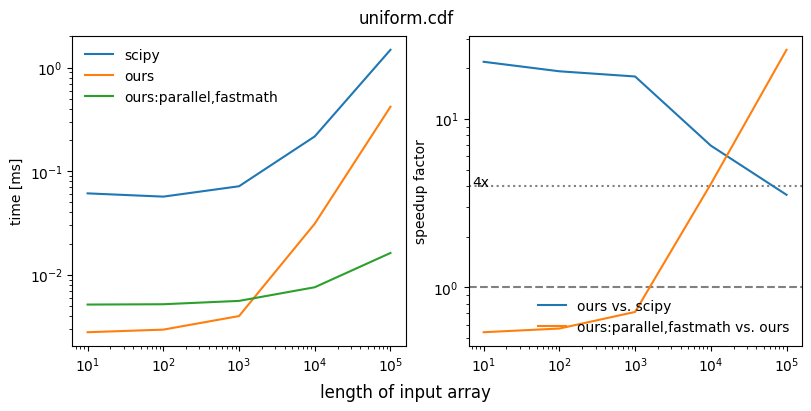

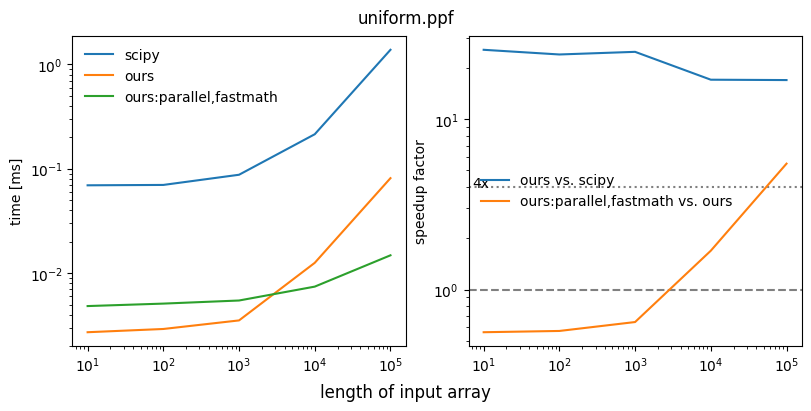

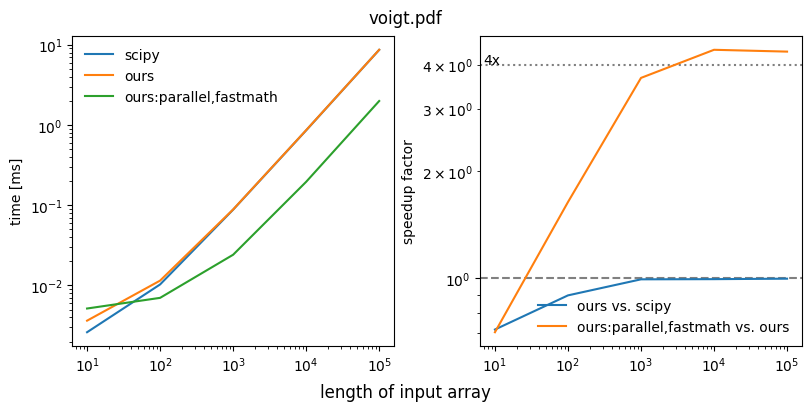

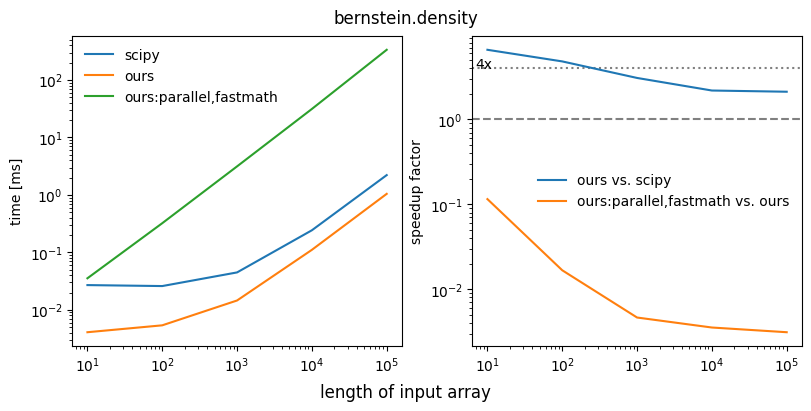

In [27]:
for kind in results:
    fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex=True, constrained_layout=True)
    r = results[kind]
    plt.suptitle(kind)
    plt.sca(ax[0])
    for lib, (x, y) in r.items():
        plt.plot(x, y * 1e3, label=lib)
    plt.ylabel("time [ms]")
    plt.legend(frameon=False)
    plt.loglog()
    plt.sca(ax[1])
    x, y = r["ours"]
    y2 = r["scipy"][1]
    plt.plot(x, y2 / y, label="ours vs. scipy")
    par = "ours:parallel,fastmath"
    if par in r:
        x, y = r[par]
        y2 = r["ours"][1]
        plt.plot(x, y2 / y, label="ours:parallel,fastmath vs. ours")
    plt.legend(frameon=False)
    plt.axhline(1, ls="--", zorder=0, color="0.5")
    plt.axhline(4, ls=":", zorder=0, color="0.5")
    plt.text(0.01, 4, "4x", transform=ax[1].get_yaxis_transform())
    plt.ylabel("speedup factor")
    plt.loglog()
    fig.supxlabel("length of input array")
    plt.savefig(f"{kind}.svg")